## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Load dataset
data=pd.read_csv("diabetes.csv")
newdataset=dataset
x=newdataset.iloc[:,0:8]
y=newdataset.iloc[:,-1]

In [9]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [10]:
# Replace zeros with median
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)
data[columns_with_zeros] = data[columns_with_zeros].fillna(data[columns_with_zeros].median())


In [11]:
# Normalize data
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 614
X_test: 154
y_train: 614
y_test: 154


## Model Training and Evaluation

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Report:\n", classification_report(y_test, y_pred_knn))

KNN Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [23]:
#Gradient Boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [24]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
print("XGBoost Report:\n", classification_report(y_test, xgb.predict(X_test)))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       107
           1       0.65      0.74      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154



c:\Users\VISWA\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:36:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
print("LightGBM Report:\n", classification_report(y_test, lgb.predict(X_test)))


[LightGBM] [Info] Number of positive: 221, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359935 -> initscore=-0.575647
[LightGBM] [Info] Start training from score -0.575647
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [26]:
#SVM
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
print("SVM Report:\n", classification_report(y_test, svm.predict(X_test)))


SVM Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic Regression Report:\n", classification_report(y_test, logreg.predict(X_test)))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Analyzing the output
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report 
print("R2 Score:",r2_score(y_test, y_pred)) 
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100) 
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred)) 

R2 Score: -0.9292105786438656
Mean Squared Error: 0.4090909090909091
Mean Absolute Error: 0.4090909090909091
Accuracy: 59.09090909090909
Confusion Matrix:
 [[74 33]
 [30 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       107
           1       0.34      0.36      0.35        47

    accuracy                           0.59       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.60      0.59      0.59       154



In [85]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=10,random_state=42)
rfc
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [50]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
RFC_model.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [88]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [49]:
# Predicting the Test set results
y_pred = KNN_model.predict(X_test)


c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [52]:
# Analyzing the output
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report 
print("R2 Score:",r2_score(y_test, y_pred)) 
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100) 
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

R2 Score: -2.276595744680851
Mean Squared Error: 0.6948051948051948
Mean Absolute Error: 0.6948051948051948
Accuracy: 30.519480519480517
Confusion Matrix:
 [[  0 107]
 [  0  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.31      1.00      0.47        47

    accuracy                           0.31       154
   macro avg       0.15      0.50      0.23       154
weighted avg       0.09      0.31      0.14       154



c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Fitting SVC to the Training set
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'linear')
SVC_model.fit(X_train, y_train)

SVC(kernel='linear')

In [103]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
# Predicting the Test set results
y_pred = SVC_model.predict(X_test)


In [55]:
# Analyzing the output
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report 
print("R2 Score:",r2_score(y_test, y_pred)) 
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred)*100) 
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred)) 

R2 Score: 0.14257307615828196
Mean Squared Error: 0.18181818181818182
Mean Absolute Error: 0.18181818181818182
Accuracy: 81.81818181818183
Confusion Matrix:
 [[97 10]
 [18 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [56]:
import pickle
pickle.dump(SVC_model, open('SVC_model.pkl','wb')) 
     

In [57]:
model = pickle.load(open('SVC_model.pkl','rb'))
print("Diabetic" if model.predict([[6,148,72,35,0,33.6,0.627,50]])[0]==1 else "Normal")
     

Diabetic


c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


##  Interpretation

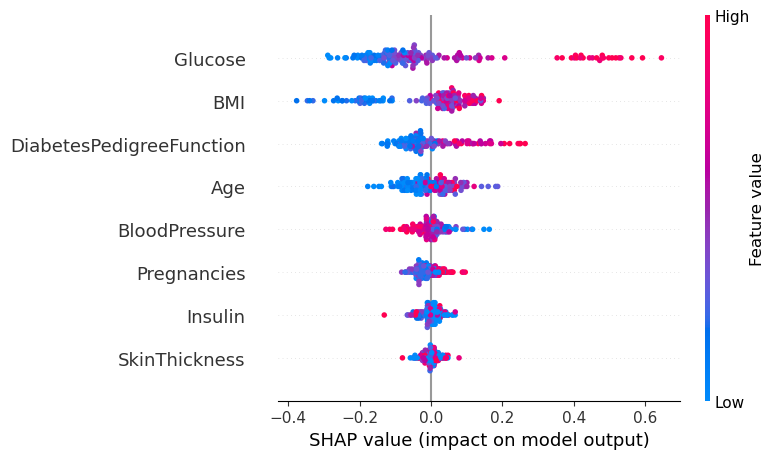

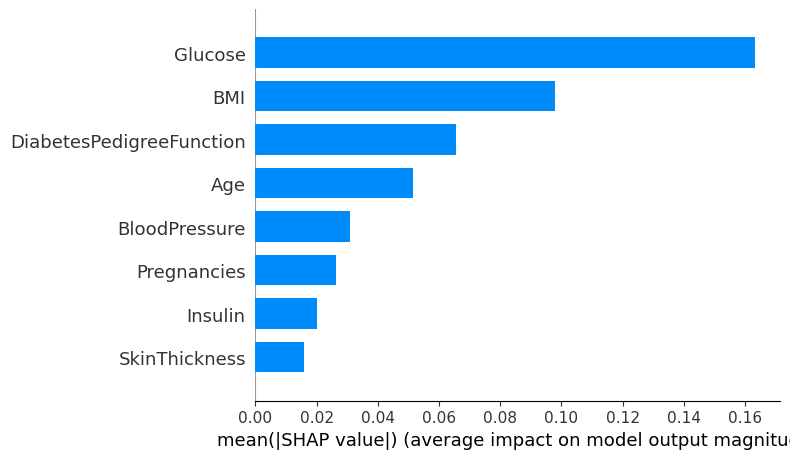

In [98]:
#SHAP
import shap
import matplotlib.pyplot as plt
explainern=shap.TreeExplainer(rfc,X_train)
values =explainern(X_test)


shap.summary_plot(values,X_test)
shap.summary_plot(values,X_test,plot_type="bar")


In [107]:
## joblib
import joblib
joblib.dump(lr,"linear.joblib")
joblib.dump(rfc,"ranodm.joblib")
joblib.dump(xgb,"xgb.joblib")

['xgb.joblib']